**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/08_mfr_00_content.ipynb))

# Chapter 8: Map, Filter, & Reduce

In this chapter, we continue the study of sequential data by looking at memory efficient ways to process the elements in a sequence. That is an important topic for the data science practitioner who must be able to work with data that does *not* fit into a single computer's memory.

As shown in [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Containers-vs.-Iterables), both the `list` objects `[0, 1, 2, 3, 4]` and `[1, 3, 5, 7, 9]` on the one side and the `range` objects `range(5)` and `range(1, 10, 2)` on the other side allow us to loop over the same numbers. However, the latter two only create *one* `int` object in every iteration while the former two create *all* `int` objects before the loop even starts. In this aspect, we consider `range` objects to be "rules" in memory that know how to calculate numbers *without* calculating them.

In [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#The-list-Type), we see how the built-in [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) constructor **materializes** the `range(1, 13)` object into the `list` object `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]`. In other words, we make `range(1, 13)` calculate *all* numbers at once and store them in a `list` object for further processing.

In many cases, however, it is not necessary to do that, and, in this chapter, we look at other types of "rules" in memory and how we can compose different "rules" together to implement bigger computations.

Next, we take a step back and continue with a simple example involving the familiar `numbers` list. Then, we iteratively exchange `list` objects with "rule"-like objects *without* changing the overall computation at all. As computations involving sequential data are commonly classified into three categories **map**, **filter**, or **reduce**, we do so too for our `numbers` example.

In [1]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

## Mapping

**Mapping** refers to the idea of applying a transformation to every element in a sequence.

For example, let's square each element in `numbers` and add `1` to the squares. In essence, we apply the transformation $y := x^2 + 1$ expressed with the `transform()` function below.

In [2]:
def transform(element):
    """Map elements to their squares plus 1."""
    return (element ** 2) + 1

With the syntax we know so far, we revert to a `for`-loop that iteratively appends the transformed elements to an initially empty `transformed_numbers` list.

In [3]:
transformed_numbers = []

for old in numbers:
    new = transform(old)
    transformed_numbers.append(new)

In [4]:
transformed_numbers

[50, 122, 65, 26, 10, 145, 5, 37, 82, 101, 2, 17]

As this kind of data processing is so common, Python provides the [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) built-in. In its simplest usage form, it takes two arguments: A transformation `function` that takes one positional argument and an `iterable`.

We call [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) with a reference to the `transform()` function and the `numbers` list as the arguments and store the result in the variable `transformer` to inspect it.

In [5]:
transformer = map(transform, numbers)

We might expect to get back a materialized sequence (i.e., all elements exist in memory), and a `list` object would feel the most natural because of the type of the `numbers` argument. However, `transformer` is an object of type `map`.

In [6]:
transformer

In [7]:
type(transformer)

map

Like `range` objects, `map` objects generate a series of objects "on the fly" (i.e., one by one), and we use the built-in [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function to obtain the next object in line. So, we should think of a `map` object as a "rule" stored in memory that only knows how to calculate the next object of possibly *infinitely* many.

In [8]:
next(transformer)

50

In [9]:
next(transformer)

122

In [10]:
next(transformer)

65

It is essential to understand that by creating a `map` object with the [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) built-in, nothing happens in memory except the creation of the `map` object. In particular, no second `list` object derived from `numbers` is created. Also, we may view `range` objects as a special case of `map` objects: They are constrained to generating `int` objects only, and the `iterable` argument is replaced with `start`, `stop`, and `step` arguments.

If we are sure that a `map` object generates a *finite* number of elements, we may materialize them into a `list` object with the built-in [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) constructor. In the example, this is the case as `transformer` is derived from a *finite* `list` object.

In summary, instead of creating an empty list first and appending it in a `for`-loop as above, we write the following one-liner and obtain an equal `transformed_numbers` list.

In [11]:
transformed_numbers = list(map(transform, numbers))

In [12]:
transformed_numbers

[50, 122, 65, 26, 10, 145, 5, 37, 82, 101, 2, 17]

## Filtering

**Filtering** refers to the idea of creating a subset of a sequence with a **boolean filter** `function` that indicates if an element should be kept (i.e., `True`) or not (i.e., `False`).

In the example, let's only keep the even elements in `numbers`. The `is_even()` function implements that as a filter.

In [13]:
def is_even(element):
    """Filter out odd numbers."""
    if element % 2 == 0:
        return True
    return False

As `element % 2 == 0` is already a boolean expression, we could shorten `is_even()` like so.

In [14]:
def is_even(element):
    """Filter out odd numbers."""
    return element % 2 == 0

As before, we first use a `for`-loop that appends the elements to be kept iteratively to an initially empty `even_numbers` list.

In [15]:
even_numbers = []

for number in transformed_numbers:
    if is_even(number):
        even_numbers.append(number)

In [16]:
even_numbers

[50, 122, 26, 10, 82, 2]

Analogously to the `map` object above, we use the [filter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#filter) built-in to create an object of type `filter` and assign it to `evens`.

In [17]:
evens = filter(is_even, transformed_numbers)

In [18]:
evens

In [19]:
type(evens)

filter

`evens` works like `transformer` above: With the built-in [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function we obtain the even numbers one by one. So, the "next" element in line is simply the next even `int` object the `filter` object encounters.

In [20]:
transformed_numbers

[50, 122, 65, 26, 10, 145, 5, 37, 82, 101, 2, 17]

In [21]:
next(evens)

50

In [22]:
next(evens)

122

In [23]:
next(evens)

26

As above, we could create a materialized `list` object with the [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) constructor.

In [24]:
list(filter(is_even, transformed_numbers))

[50, 122, 26, 10, 82, 2]

We may also chain `map` and `filter` objects derived from the original `numbers` list.

In [25]:
list(
    filter(
        is_even,
        map(transform, numbers),
    )
)

[50, 122, 26, 10, 82, 2]

Using the [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) and [filter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#filter) built-ins, we can quickly switch the order: Filter first and then transform the remaining elements. This variant equals the "*A simple Filter*" example in [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Example:-A-simple-Filter). On the contrary, code with `for`-loops and `if` statements is more tedious to adapt. Additionally, `map` and `filter` objects loop "at the C level" and are a lot faster because of that. Because of that, Pythonistas tend to *not* use explicit `for`-loops so much.

In [26]:
list(
    map(
        transform,
        filter(is_even, numbers),
    )
)

[65, 145, 5, 37, 101, 17]

## Reducing

Lastly, **reducing** sequential data means to summarize the elements into a single statistic.

A simple example is the built-in [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) function.

In [27]:
sum(
    map(
        transform,
        filter(is_even, numbers),
    )
)

370

Other straightforward examples are the built-in [min() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#min) or [max() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#max) functions.

In [28]:
min(map(transform, filter(is_even, numbers)))

5

In [29]:
max(map(transform, filter(is_even, numbers)))

145

[sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum), [min() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#min), and [max() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#max) can be regarded as special cases.

The generic way of reducing a sequence is to apply a function of *two* arguments on a rolling horizon: Its first argument is the reduction of the elements processed so far, and the second the next element to be reduced.

For illustration, let's replicate [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) as such a function, called `sum_alt()`. Its implementation only adds two numbers.

In [30]:
def sum_alt(sum_so_far, next_number):
    """Reduce a sequence by addition."""
    return sum_so_far + next_number

Further, we create a *new* `map` object derived from `numbers` ...

In [31]:
evens_transformed = map(transform, filter(is_even, numbers))

... and loop over all *but* the first element it generates. The latter is captured separately as the initial `result` with the [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function. We know from above that `evens_transformed` generates *six* elements. That is why we see *five* growing `result` values resembling a [cumulative sum](http://mathworld.wolfram.com/CumulativeSum.html). The first `210` is the sum of the first two elements generated by `evens_transformed`, `65` and `145`.

So, we also learn that `map` objects, and analogously `filter` objects, are *iterable* as we may loop over them.

In [32]:
result = next(evens_transformed)

for number in evens_transformed:
    result = sum_alt(result, number)
    print(result, end=" ")  # line added for didactical purposes

210 215 252 353 370 

The final `result` is the same `370` as above.

In [33]:
result

370

The [reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) function in the [functools <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides more convenience (and speed) replacing the `for`-loop. It takes two arguments, `function` and `iterable`, in the same way as the [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) and [filter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#filter) built-ins.

[reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) is **[eager <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Eager_evaluation)** meaning that all computations implied by the contained `map` and `filter` "rules" are executed immediately, and the code cell evaluates to `370`. On the contrary, [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) and [filter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#filter) create **[lazy <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Lazy_evaluation)** `map` and `filter` objects, and we have to use the [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function to obtain the elements.

In [34]:
from functools import reduce

In [35]:
reduce(
    sum_alt,
    map(
        transform,
        filter(is_even, numbers),
    )
)

370

## Lambda Expressions

[map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map), [filter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#filter), and [reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) take a `function` object as their first argument, and we defined `transform()`, `is_even()`, and `sum_alt()` to be used precisely for that.

Often, such functions are used *only once* in a program. However, the primary purpose of functions is to *reuse* them. In such cases, it makes more sense to define them "anonymously" right at the position where the first argument goes.

As mentioned in [Chapter 2 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/02_functions_00_content.ipynb#Anonymous-Functions), we use `lambda` expressions to create `function` objects *without* a name referencing them.

So, the above `sum_alt()` function could be rewritten as a `lambda` expression like so ...

In [36]:
lambda sum_so_far, next_number: sum_so_far + next_number

<function __main__.<lambda>(sum_so_far, next_number)>

... or even shorter.

In [37]:
lambda x, y: x + y

<function __main__.<lambda>(x, y)>

With the new concepts in this section, we can rewrite the entire example in just a few lines of code *without* any `for`, `if`, and `def` statements. The resulting code is concise, easy to read, quick to modify, and even faster in execution. Most importantly, it is optimized to handle big amounts of data as *no* temporary `list` objects are materialized in memory.

In [38]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]
evens = filter(lambda x: x % 2 == 0, numbers)
transformed = map(lambda x: (x ** 2) + 1, evens)
sum(transformed)

370

If `numbers` comes as a sorted sequence of whole numbers, we may use the [range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range) built-in and get away *without* any `list` object in memory at all!

In [39]:
numbers = range(1, 13)
evens = filter(lambda x: x % 2 == 0, numbers)
transformed = map(lambda x: (x ** 2) + 1, evens)
sum(transformed)

370

To additionally save the temporary variables, `numbers`, `evens`, and `transformed`, we write the entire computation as *one* expression.

In [40]:
sum(
    map(
        lambda x: (x ** 2) + 1,
        filter(
            lambda x: x % 2 == 0,
            range(1, 13),
        )
    )
)

370

PythonTutor visualizes the differences in the number of computational steps and memory usage:
- [Version 1 <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20is_even%28element%29%3A%0A%20%20%20%20if%20element%20%25%202%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%20True%0A%20%20%20%20return%20False%0A%0Adef%20transform%28element%29%3A%0A%20%20%20%20return%20%28element%20**%202%29%20%2B%201%0A%0Anumbers%20%3D%20list%28range%281,%2013%29%29%0A%0Aevens%20%3D%20%5B%5D%0Afor%20number%20in%20numbers%3A%0A%20%20%20%20if%20is_even%28number%29%3A%0A%20%20%20%20%20%20%20%20evens.append%28number%29%0A%0Atransformed%20%3D%20%5B%5D%0Afor%20number%20in%20evens%3A%0A%20%20%20%20transformed.append%28transform%28number%29%29%0A%0Aresult%20%3D%20sum%28transformed%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false): With `for`-loops, `if` statements, and named functions -> **116** steps and **3** `list` objects
- [Version 2 <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20range%281,%2013%29%0Aevens%20%3D%20filter%28lambda%20x%3A%20x%20%25%202%20%3D%3D%200,%20numbers%29%0Atransformed%20%3D%20map%28lambda%20x%3A%20%28x%20**%202%29%20%2B%201,%20evens%29%0Aresult%20%3D%20sum%28transformed%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false): With named `map` and `filter` objects -> **58** steps and **no** `list` object
- [Version 3 <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=result%20%3D%20sum%28map%28lambda%20x%3A%20%28x%20**%202%29%20%2B%201,%20filter%28lambda%20x%3A%20x%20%25%202%20%3D%3D%200,%20range%281,%2013%29%29%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false): Everything in *one* expression -> **55** steps and **no** `list` object

Versions 2 and 3 are the same, except for the three additional steps required to create the temporary variables. The *major* downside of Version 1 is that, in the worst case, it may need *three times* the memory as compared to the other two versions!

An experienced Pythonista would probably go with Version 2 in a production system to keep the code readable and maintainable.

The map-filter-reduce paradigm has caught attention in recent years as it enables **[parallel computing <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Parallel_computing)**, and this gets important when dealing with big amounts of data. The workings in the memory as shown in this section provide an idea why.

## List Comprehensions

For [map() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#map) and [filter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#filter), Python provides an alternative syntax appealing to people who like mathematical notations.

Consider again the original "*A simple Filter*" example from [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Example:-A-simple-Filter), re-written such that both the mapping and the filtering are done in *one* `for`-loop instead of the *two* above.

In [41]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [42]:
evens_transformed = []

for number in numbers:
    if number % 2 == 0:
        evens_transformed.append((number ** 2) + 1)

In [43]:
sum(evens_transformed)

370

**List comprehensions**, or **listcomps** for short, are *expressions* to derive *new* `list` objects out of *existing* ones (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/expressions.html#displays-for-lists-sets-and-dictionaries)). Practically, this means that we place the `for` and `if` inside brackets `[` and `]`.

So, the example can be written in a single *expression* like below replacing the compound `for` *statement* above.

In [44]:
[(n ** 2) + 1 for n in numbers if n % 2 == 0]

[65, 145, 5, 37, 101, 17]

A list comprehension may be used in place of any `list` object.

For example, let's rewrite the "*A simple Filter*" example from [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Example:-A-simple-Filter) in just one line. As a caveat, the code below *materializes* all elements in memory *before* summing them up, and may, therefore, cause a `MemoryError` when executed with a bigger `numbers` list. We see with [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20range%281,%2013%29%0Aresult%20%3D%20sum%28%5B%28n%20**%202%29%20%2B%201%20for%20n%20in%20numbers%20if%20n%20%25%202%20%3D%3D%200%5D%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) how a `list` object exists in memory at step 17 and then "gets lost" right after. As the next section shows, this downside may be mitigated.

In [45]:
sum([(n ** 2) + 1 for n in numbers if n % 2 == 0])

370

#### Example: Nested Lists

List comprehensions may come with several `for`'s and `if`'s.

The cell below creates a `list` object that contains three other `list` objects with a series of numbers in them. The first and last numbers in each inner `list` object are offset by `1`.

In [46]:
nested_numbers = [list(range(x, y + 1)) for x, y in zip([1, 2, 3], [7, 8, 9])]

In [47]:
nested_numbers

[[1, 2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [3, 4, 5, 6, 7, 8, 9]]

To do something meaningful with the numbers, we have to remove the inner layer of `list` objects and **flatten** (i.e., "un-nest") the data.

Without list comprehensions, we achieve that with two nested `for`-loops.

In [48]:
flat_numbers = []

for inner_numbers in nested_numbers:
    for number in inner_numbers:
        flat_numbers.append(number)

In [49]:
flat_numbers

[1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 8, 9]

That translates into a list comprehension like below. The order of the `for`'s may be confusing at first but is the *same* as writing out the nested `for`-loops as above.

In [50]:
[number for inner_numbers in nested_numbers for number in inner_numbers]

[1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 8, 9]

Now, we may use the `list` object resulting from the list comprehension in any way we want.

For example, to add up the flattened numbers with [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum). The same caveat holds as before: The `list` object passed into [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) is *materialized* with *all* its elements *before* the sum is calculated!

In [51]:
sum([number for inner_numbers in nested_numbers for number in inner_numbers])

105

In this particular example, however, we can exploit the fact that any sum of numbers can be expressed as the sum of sums of mutually exclusive and collectively exhaustive subsets of these numbers and get away with just *one* `for` in the list comprehension.

In [52]:
sum([sum(inner_numbers) for inner_numbers in nested_numbers])

105

#### Example: Working with Cartesian Products

A popular use case of nested list comprehensions is applying a transformation to each $n$-tuple in the [Cartesian product <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Cartesian_product) created from elements of $n$ iterables. In the generic illustration below, a transformation $f(x, y)$ is applied to each $2$-tuple in the Cartesian product $X \times Y$ where $x$ is an element in $X = \{x_1, x_2, x_3\}$ and $y$ is an element in $Y = \{y_1, y_2, y_3\}$.

|$Y$ \ $X$|    $x_1$     |    $x_2$     |    $x_3$     |
|---------|--------------|--------------|--------------|
|  $y_1$  |f($x_1$,$y_1$)|f($x_2$,$y_1$)|f($x_3$,$y_1$)|
|  $y_2$  |f($x_1$,$y_2$)|f($x_2$,$y_2$)|f($x_3$,$y_2$)|
|  $y_3$  |f($x_1$,$y_3$)|f($x_2$,$y_3$)|f($x_3$,$y_3$)|

For example, let's add each quotient obtained by taking the numerator $x$ from `[10, 20, 30]` and the denominator $y$ from `[40, 50, 60]` to `1`, and then find the overall product. This transformation can be described mathematically as the function $z = f(x, y)$ below.

$$z = f(x, y) = \prod{ (1 + \frac{x}{y} )}$$

Further, the table below visualizes the calculations: The result is the product of *nine* entries.

|`y` \ `x`|**10**|**20**|**30**|
|------|------|------|------|
|**40**| 1.25 | 1.50 | 1.75 |
|**50**| 1.20 | 1.40 | 1.60 |
|**60**| 1.17 | 1.33 | 1.50 |

To express that in Python, we start by creating two `list` objects, `first` and `second`.

In [53]:
first = [10, 20, 30]
second = [40, 50, 60]

For a Cartesian product, we must loop over *all* possible $2$-tuples where one element is drawn from `first` and the other from `second`. We achieve that with two nested `for`-loops, in which we calculate each `quotient` and append it to an initially empty `cartesian_product` list.

In [54]:
cartesian_product = []

for numerator in first:
    for denominator in second:
        quotient = 1 + (numerator / denominator)
        cartesian_product.append(quotient)

cartesian_product

[1.25, 1.2, 1.1666666666666667, 1.5, 1.4, 1.3333333333333333, 1.75, 1.6, 1.5]

Next, we convert the two explicit `for`-loops into one list comprehensions and use `x` and `y` as shorter variable names.

In [55]:
[1 + (x / y) for x in first for y in second]

[1.25, 1.2, 1.1666666666666667, 1.5, 1.4, 1.3333333333333333, 1.75, 1.6, 1.5]

The order of the `for`'s is *important*: The list comprehension above divides numbers from `first` by numbers from `second`, whereas the list comprehension below does the opposite.

In [56]:
[1 + (x / y) for x in second for y in first]

[5.0, 3.0, 2.333333333333333, 6.0, 3.5, 2.666666666666667, 7.0, 4.0, 3.0]

To find the overall product, we *unpack* the list comprehension into the `product()` function from the "*Function Definitions & Calls*" sub-section in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Function-Definitions-&-Calls).

In [57]:
def product(*args):
    """Multiply all arguments."""
    result = args[0]

    for arg in args[1:]:
        result *= arg

    return result

In [58]:
product(*[1 + (x / y) for x in first for y in second])

20.58

Alternatively, we use a `lambda` expression with the [reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) function from the [functools <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html) module.

In [59]:
reduce(lambda x, y: x * y, [1 + (x / y) for x in first for y in second])

20.58

While this example is stylized, Cartesian products are hidden in many applications, and it shows how the various language features introduced in this chapter can be seamlessly combined to process sequential data.

## Generator Expressions

Because of the high memory consumption, Pythonistas avoid materialized `list` objects, and, thus, also list comprehensions, whenever possible. Instead, they prefer to work with **[generator expressions <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/expressions.html#generator-expressions)**, or **genexps** for short. Syntactically, they work like list comprehensions except that parentheses, `(` and `)`, replace brackets, `[` and `]`.

Let's go back to the original "*A simple Filter*" example from [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Example:-A-simple-Filter) one more time, apply the transformation $y := x^2 + 1$ to all even `numbers`, and sum them up.

In [60]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

To filter and transform `numbers`, we wrote a list comprehension above ...

In [61]:
[(n ** 2) + 1 for n in numbers if n % 2 == 0]

[65, 145, 5, 37, 101, 17]

... that now becomes a generator expression.

In [62]:
((n ** 2) + 1 for n in numbers if n % 2 == 0)

<generator object <genexpr> at 0x7f001cf938d0>

A generator expression evaluates to yet another "rule"-like object in memory that knows how to generate the individual objects in a series one by one. Whereas a list comprehension materializes its elements in memory *when* it is evaluated, the opposite holds true for generator expressions: *No* object is created in memory except the "rule" itself. Because of this behavior, we describe generator expressions as *lazy* and list comprehensions as *eager*.

To materialize the elements specified by a generator expression, we use the [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) constructor as seen above.

In [63]:
list(((n ** 2) + 1 for n in numbers if n % 2 == 0))

[65, 145, 5, 37, 101, 17]

Whenever a generator expression is the only argument in a function call, we may merge the double parentheses, `((` and `))`, into just `(` and `)`.

In [64]:
list((n ** 2) + 1 for n in numbers if n % 2 == 0)

[65, 145, 5, 37, 101, 17]

A common use case is to reduce the elements into a single object instead, for example, by adding them up with [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) as in the original "*A simple Filter*" example. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20range%281,%2013%29%0Asum_with_list%20%3D%20sum%28%5B%28n%20**%202%29%20%2B%201%20for%20n%20in%20numbers%20if%20n%20%25%202%20%3D%3D%200%5D%29%0Asum_with_gen%20%3D%20sum%28%28n%20**%202%29%20%2B%201%20for%20n%20in%20numbers%20if%20n%20%25%202%20%3D%3D%200%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows how the code cell below does *not* create a temporary `list` object in memory whereas a list comprehension would do so (cf., step 17).

In [65]:
sum((n ** 2) + 1 for n in numbers if n % 2 == 0)

370

Let's assign the object to which the generator expression below evaluates to to a variable and inspect it.

In [66]:
gen = ((n ** 2) + 1 for n in numbers if n % 2 == 0)

In [67]:
gen

<generator object <genexpr> at 0x7f001cf93b50>

Unsurprisingly, generator expressions create objects of type `generator`.

In [68]:
type(gen)

generator

`generator` objects work just like the `map` and `filter` objects above. So, with the [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function, we can generate elements one by one.

In [69]:
next(gen)

65

In [70]:
next(gen)

145

In [71]:
next(gen)

5

In [72]:
next(gen)

37

In [73]:
next(gen)

101

In [74]:
next(gen)

17

Once a `generator` object runs out of elements, it raises a `StopIteration` exception, and we say that the `generator` object is **exhausted**. To loop over its elements again, we must create a *new* one.

In [75]:
next(gen)

StopIteration: 

In [76]:
next(gen)

StopIteration: 

Calling the [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function repeatedly with the *same* `generator` object as the argument is essentially what a `for` statement automates for us. So, `generator` objects are *iterable*. We look into this in detail further below in the "*The `for` Statement (revisited)*" section.

In [77]:
for number in ((n ** 2) + 1 for n in numbers if n % 2 == 0):
    print(number, end=" ")

65 145 5 37 101 17 

#### Example: Nested Lists (revisited)

If we are only interested in a *reduction* of `nested_numbers` into a single statistic, as the overall sum in the "*Nested Lists*" example above, we should replace lists or list comprehensions with generator expressions wherever possible. The result is the *same*, but no intermediate `list` objects are materialized! That makes our code scale to large amounts of data.

Let's adapt the example reuse `nested_numbers` from above.

In [78]:
nested_numbers

[[1, 2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [3, 4, 5, 6, 7, 8, 9]]

Compared to the implementation with the list comprehension above, we simply remove the brackets, `[` and `]`: The argument to [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) becomes a generator expression.

In [79]:
sum(number for inner_numbers in nested_numbers for number in inner_numbers)

105

That also holds for the alternative formulation as a sum of sums.

In [80]:
sum(sum(inner_numbers) for inner_numbers in nested_numbers)

105

Because `nested_numbers` has an internal structure (i.e., the inner lists are series of consecutive integers), we can even provide an effectively **memoryless** implementation by expressing it as a generator expression derived from `range` objects. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=nested_numbers%20%3D%20%28%28range%28x,%20y%20%2B%201%29%29%20for%20x,%20y%20in%20zip%28range%281,%204%29,%20range%287,%2010%29%29%29%0Aresult%20%3D%20sum%28number%20for%20inner_numbers%20in%20nested_numbers%20for%20number%20in%20inner_numbers%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) confirms that no `list` objects materialize at any point in time.

In [81]:
nested_numbers = ((range(x, y + 1)) for x, y in zip(range(1, 4), range(7, 10)))

In [82]:
nested_numbers

<generator object <genexpr> at 0x7f001cfb10d0>

In [83]:
sum(number for inner_numbers in nested_numbers for number in inner_numbers)

105

We must be careful when assigning a `generator` object to a variable: If we use `nested_numbers` again, for example, in the alternative formulation below, [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) returns `0` because `nested_numbers` is exhausted after executing the previous code cell. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=nested_numbers%20%3D%20%28%28range%28x,%20y%20%2B%201%29%29%20for%20x,%20y%20in%20zip%28range%281,%204%29,%20range%287,%2010%29%29%29%0Aresult%20%3D%20sum%28number%20for%20inner_numbers%20in%20nested_numbers%20for%20number%20in%20inner_numbers%29%0Ano_result%20%3D%20sum%28sum%28inner_numbers%29%20for%20inner_numbers%20in%20nested_numbers%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) also shows that.

In [84]:
sum(sum(inner_numbers) for inner_numbers in nested_numbers)

0

#### Example: Working with Cartesian Products (revisited)

Let's also rewrite the "*Working with Cartesian Products*" example from above with generator expressions.

As a first optimization, we replace the materialized `list` objects, `first` and `second`, with memoryless `range` objects.

In [85]:
first = range(10, 31, 10)  # "==" [10, 20, 30]
second = range(40, 61, 10)  # "==" [40, 50, 60]

Now, the first of the two alternative solutions may be more appealing to many readers. In general, many practitioners seem to dislike `lambda` expressions.

In the first solution, we *unpack* the elements produced by `(1 + (x / y) for x in first for y in second)` into the `product()` function from the "*Function Definitions & Calls*" sub-section in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Function-Definitions-&-Calls). However, inside `product()`, the elements are *packed* into `args`, a *materialized* `tuple` object! So, all the memory efficiency gained by using a generator expression is lost! [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20product%28*args%29%3A%0A%20%20%20%20result%20%3D%20args%5B0%5D%0A%20%20%20%20for%20arg%20in%20args%5B1%3A%5D%3A%0A%20%20%20%20%20%20%20%20result%20*%3D%20arg%0A%20%20%20%20return%20result%0A%0Afirst%20%3D%20range%2810,%2031,%2010%29%0Asecond%20%3D%20range%2840,%2061,%2010%29%0A%0Aresult%20%3D%20product%28*%281%20%2B%20%28x%20/%20y%29%20for%20x%20in%20first%20for%20y%20in%20second%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows how a `tuple` object exists in steps 38-58.

In [86]:
product(*(1 + (x / y) for x in first for y in second))  # not memory efficient!

20.58

On the contrary, the second solution with the [reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) function from the [functools <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html) module and the `lambda` expression works *without* all elements materialized at the same time, and [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=from%20functools%20import%20reduce%0A%0Afirst%20%3D%20range%2810,%2031,%2010%29%0Asecond%20%3D%20range%2840,%2061,%2010%29%0A%0Aresult%20%3D%20reduce%28%0A%20%20%20%20lambda%20x,%20y%3A%20x%20*%20y,%0A%20%20%20%20%281%20%2B%20%28x%20/%20y%29%20for%20x%20in%20first%20for%20y%20in%20second%29%0A%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) confirms that. So, only the second alternative is truly memory-efficient!

In [87]:
reduce(lambda x, y: x * y, (1 + (x / y) for x in first for y in second))

20.58

In summary, we learn from this example that unpacking `generator` objects *may* be a *bad* idea.

#### Example: Averaging all even Numbers in a List (revisited)

With the new concepts in this chapter, let's rewrite the book's introductory "*Averaging all even Numbers in a List*" example from [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Example:-Averaging-all-even-Numbers-in-a-List) such that it efficiently handles a large sequence of numbers. We continue from its latest implementation, the `average_evens()` function in the "*Keyword-only Arguments*" section in [Chapter 2 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/02_functions_00_content.ipynb#Keyword-only-Arguments).

We assume that `average_evens()` is called with a *finite* and *iterable* object that generates a **stream** of numeric objects that can be cast as `int` objects. After all, the idea of even and odd numbers makes sense only in the context of whole numbers.

The generator expression `(round(n) for n in numbers)` implements the type casting, and when it is evaluated, *nothing* happens except that a `generator` object is assigned to `integers`. Then, with the [reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) function from the [functools <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html) module, we *simultaneously* add up *and* count the even numbers with the `generator` object to which the inner generator expression `((n, 1) for n in integers if n % 2 == 0)` evaluates to. That `generator` object takes the `integers` generator as its source and produces `tuple` objects consisting of the next *even* number in line and `1`. Two such `tuple` objects are then iteratively passed to the `function` object to which the `lambda` expression evaluates to. `x` represents the total and the count of the even numbers processed so far, while `y`'s first element, `y[0]`, is the next *even* number to be added to the running total. The result of calling [reduce() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functools.html#functools.reduce) is again a `tuple` object, namely the final `total` and `count`. Lastly, we calculate the simple average and scale it.

In summary, this implementation of `average_evens()` does *not* keep materialized `list` objects internally like its predecessors in [Chapter 2 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/02_functions_00_content.ipynb) but processes the elements of the `numbers` argument on a one-by-one basis.

In [88]:
def average_evens(numbers, *, scalar=1):
    """Calculate the average of all even numbers.

    Args:
        numbers (iterable): a finite stream of the numbers to be averaged;
            if non-whole numbers are provided, they are rounded
        scalar (float, optional): multiplies the average; defaults to 1

    Returns:
        float: (scaled) average
    """
    integers = (round(n) for n in numbers)
    total, count = reduce(
        lambda x, y: (x[0] + y[0], x[1] + y[1]),
        ((n, 1) for n in integers if n % 2 == 0)
    )
    return scalar * total / count

In [89]:
average_evens([7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4], scalar=1)

7.0

We may provide an optional `scalar` argument as before.

In [90]:
average_evens([7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4], scalar=2)

14.0

An argument with `float` objects works just as well.

In [91]:
average_evens([7., 11., 8., 5., 3., 12., 2., 6., 9., 10., 1., 4.])

7.0

To show that `average_evens()` can process a large stream of data, we simulate `10_000_000` randomly drawn integers between `0` and `100` with the [randint() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.randint) function from the [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module. We use a generator expression derived from a `range` object as the `numbers` argument. So, at *no* point in time is there a materialized `list` or `tuple` object in memory. The result approaching `50` confirms that [randint() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.randint) must be based on a uniform distribution.

In [92]:
import random

In [93]:
random.seed(42)

In [94]:
average_evens(random.randint(0, 100) for _ in range(10_000_000))

49.994081434519636

To show that `average_evens()` filters out odd numbers, we simulate another stream of `10_000_000` randomly drawn odd integers between `1` and `99`. As no function in the [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module does that "out of the box," we must be creative: Doubling a number drawn from `random.randint(0, 49)` results in an even number between `0` and `98`, and adding `1` makes it odd. Then, `average_evens()` raises a `TypeError`, essentially because `(int(n) for n in numbers)` does not generate any element.

In [95]:
average_evens(2 * random.randint(0, 49) + 1 for _ in range(10_000_000))

TypeError: reduce() of empty sequence with no initial value

## "Tuple Comprehensions"

There is no syntax to derive *new* `tuple` objects out of existing ones. However, we can mimic such a construct by combining the built-in [tuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-tuple) constructor with a generator expression.

So, to convert the list comprehension `[(n ** 2) + 1 for n in numbers if n % 2 == 0]` from above into a "tuple comprehension," we write the following.

In [96]:
tuple((n ** 2) + 1 for n in numbers if n % 2 == 0)

(65, 145, 5, 37, 101, 17)

## Boolean Reducers

Besides [min() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#min), [max() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#max), and [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum), Python provides two boolean reduce functions: [all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all) and [any() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#any).

Let's look at straightforward examples involving `numbers` again.

In [97]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

[all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all) takes an `iterable` argument and returns `True` if *all* elements are *truthy*.

For example, let's check if the square of each element in `numbers` is below `100` or `150`, respectively. We express the computation with a generator expression passed as the only argument to [all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all).

In [98]:
all(x ** 2 < 100 for x in numbers)

False

In [99]:
all(x ** 2 < 150 for x in numbers)

True

[all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all) can be viewed as syntactic sugar replacing a `for`-loop: Internally, [all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all) implements the *short-circuiting* strategy explained in [Chapter 3 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/03_conditionals_00_content.ipynb#Short-Circuiting), and we mimic that by testing for the *opposite* condition in the `if` statement and stopping the `for`-loop early with the `break` statement. In the worst case, if `threshold` were, for example, `150`, we would loop over *all* elements in the `iterable` argument, which must be *finite* for the code to work. So, [all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all) is a *linear search* in disguise.

In [100]:
threshold = 100

for number in numbers:
    if number ** 2 >= threshold:  # the opposite of what we are checking for
        all_below_threshold = False
        break
else:
    all_below_threshold = True

all_below_threshold

False

The documentation of [all() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#all) shows in another way what it does with code: By placing a `return` statement in a `for`-loop's body inside a function, iteration is stopped prematurely once an element does *not* meet the condition. That is the familiar *early exit* pattern at work.

In [101]:
def all_alt(iterable):
    """Alternative implementation of the built-in all() function."""
    for element in iterable:
        if not element:  # the opposite of what we are checking for
            return False
    return True

In [102]:
all_alt(x ** 2 < 100 for x in numbers)

False

In [103]:
all_alt(x ** 2 < 150 for x in numbers)

True

Similarly, [any() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#any) checks if *at least* one element in the `iterable` argument is *truthy*.

To continue the example, let's check if the square of *any* element in `numbers` is above `100` or `150`, respectively.

In [104]:
any(x ** 2 > 100 for x in numbers)

True

In [105]:
any(x ** 2 > 150 for x in numbers)

False

The code cell below shows how [any() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#any) works internally: It also follows the *short-circuiting* strategy. Here, we do *not* need to check for the opposite condition.

In [106]:
threshold = 100

for number in numbers:
    if number ** 2 > threshold:
        any_above_threshold = True
        break
else:
    any_above_threshold = False

any_above_threshold

True

The alternative formulation in the documentation of [any() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#any) is straightforward and also uses the early exit pattern.

In [107]:
def any_alt(iterable):
    """Alternative implementation of the built-in any() function."""
    for element in iterable:
        if element:
            return True
    return False

In [108]:
any_alt(x ** 2 > 100 for x in numbers)

True

In [109]:
any_alt(x ** 2 > 150 for x in numbers)

False

## Iterators vs. Iterables

Similarly to how we classify different *concrete* data types like `list` or `str` by how they behave *abstractly* in a given context in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Collections-vs.-Sequences), we also do so for the data types we have introduced in this chapter.

Here, the `map`, `filter`, and `generator` types all behave like "rules" in memory that govern how objects are produced "on the fly." Their main commonality is their support for the built-in [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function. In computer science terminology, such data types are called **[iterators <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Iterator)**, and the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module formalizes them with the `Iterator` ABC in Python.

So, one example of an iterator is `evens_transformed` below, an object of type `generator`.

In [110]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [111]:
evens_transformed = ((x ** 2) + 1 for x in numbers if x % 2 == 0)

Let's first confirm that `evens_transformed` is indeed an `Iterator`, "abstractly speaking."

In [112]:
import collections.abc as abc

In [113]:
isinstance(evens_transformed, abc.Iterator)

True

In Python, iterators are *always* also iterables. The reverse is *not* true! To be precise, iterators are *specializations* of iterables. That is what the "Inherits from" column means in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module's documentation.

In [114]:
isinstance(evens_transformed, abc.Iterable)

True

Furthermore, we sharpen our definition of an *iterable* from [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Collections-vs.-Sequences): Just as we defined an *iterator* to be any object that supports the [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) function, we define an *iterable* to be any object that supports the built-in [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) function.

The confused reader may now be wondering how the two concepts relate to each other.

In short, the [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) function is the general way to create an *iterator* object out of a given *iterable* object. Then, the *iterator* object manages the iteration over the *iterable* object. In real-world code, we hardly ever see [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) as Python calls it for us in the background. 

For illustration, let's do that ourselves and create *two* iterators out of the iterable `numbers` and see what we can do with them.

In [115]:
iterator1 = iter(numbers)

In [116]:
iterator2 = iter(numbers)

`iterator1` and `iterator2` are of type `list_iterator`.

In [117]:
type(iterator1)

list_iterator

*Iterators* are useful for only *one* thing: Get the next object from the associated *iterable*.

By calling [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) three times with `iterator1` as the argument, we obtain the first three elements of `numbers`.

In [118]:
next(iterator1), next(iterator1), next(iterator1)

(7, 11, 8)

`iterator1` and `iterator2` keep their *states* separate. So, we could loop over an *iterable* in parallel.

In [119]:
next(iterator1), next(iterator2)

(5, 7)

We can also play a "trick" and exchange some elements in `numbers`. `iterator1` and `iterator2` do *not* see these changes and present us with the new elements. So, *iterators* not only have state on their own but also keep this separate from the underlying *iterable*.

In [120]:
numbers[1], numbers[4] = 99, 99

In [121]:
next(iterator1), next(iterator2)

(99, 99)

Let's re-assign the elements in `numbers` so that they are in order. Now, the numbers returned from [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) also tell us how often [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) was called with `iterator1` or `iterator2`. We conclude that `list_iterator` objects work by simply keeping track of the *last* index obtained from the underlying *iterable*.

In [122]:
numbers[:] = list(range(1, 13))

In [123]:
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [124]:
next(iterator1), next(iterator2)

(6, 3)

With the concepts introduced in this section, we can now understand the first sentence in the documentation on the [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) built-in better: "Make an *iterator* that aggregates elements from each of the *iterables*."

Because *iterators* are always also *iterables*, we may pass `iterator1` and `iterator2` as arguments to [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip).

The returned `zipper` object is of type `zip` and, "abstractly speaking," an `Iterator` as well.

In [125]:
zipper = zip(iterator1, iterator2)

In [126]:
zipper

In [127]:
type(zipper)

zip

In [128]:
isinstance(zipper, abc.Iterator)

True

So far, we have always used [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) in a `for`-loop. That was our earlier definition of an *iterable*. Our revised definition in this section states that an *iterable* is an object that supports the [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) function. So, let's see what happens if we pass `zipper` to [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter).

In [129]:
zipper_iterator = iter(zipper)

In [130]:
zipper_iterator

`zipper_iterator` references the *same* object as `zipper`! That is true for *iterators* in general: Any *iterator* created from an existing *iterator* with [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) is the *iterator* itself.

In [131]:
zipper is zipper_iterator

True

The Python core developers made that design decision so that *iterators* may also be looped over.

The `for`-loop below prints out only *six* more `tuple` objects derived from the now ordered `numbers` because the `iterator1` object hidden inside `zipper` already returned its first *six* elements. So, the respective first elements of the `tuple` objects printed range from `7` to `12`. Similarly, as `iterator2` already returned its first *three* elements from `numbers`, we see the respective second elements in the range from `4` to `9`.

In [132]:
for x, y in zipper:
    print(x, "and", y, end="   ")

7 and 4   8 and 5   9 and 6   10 and 7   11 and 8   12 and 9   

`zipper` is now *exhausted*. So, the `for`-loop below does *not* make any iteration at all.

In [133]:
for x, y in zipper:
    raise RuntimeError("We won't see this error")

We verify that `iterator1` is exhausted by passing it to [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next) again, which raises a `StopIteration` exception.

In [134]:
next(iterator1)

StopIteration: 

On the contrary, `iterator2` is *not* yet exhausted.

In [135]:
next(iterator2)

10

Understanding *iterators* and *iterables* is helpful for any data science practitioner that deals with large amounts of data. Even without that, these two terms occur everywhere in Python-related texts and documentation. So, a beginner should regularly review this section until it becomes second nature.

### The `for` Statement (revisited)

In [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#The-for-Statement), we argue that the `for` statement is syntactic sugar, replacing the `while` statement in many common scenarios. In particular, a `for`-loop saves us two tasks: Managing an index variable *and* obtaining the individual elements by indexing. In this sub-section, we look at a more realistic picture, using the new terminology as well.

Let's print out the elements of a `list` object as the *iterable* being looped over.

In [136]:
iterable = [0, 1, 2, 3, 4]

In [137]:
for element in iterable:
    print(element, end=" ")

0 1 2 3 4 

Our previous and equivalent formulation with a `while` statement is like so.

In [138]:
index = 0

while index < len(iterable):
    element = iterable[index]
    print(element, end=" ")
    index += 1

del index

0 1 2 3 4 

What actually happens behind the scenes in the Python interpreter is shown below.

First, Python calls [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) with the `iterable` to be looped over as the argument. The returned `iterator` contains the entire logic of how the `iterable` is looped over. In particular, the `iterator` may or may not pick the `iterable`'s elements in a predictable order. That is up to the "rule" it models.

Second, Python enters an *indefinite* `while`-loop. It tries to obtain the next element with [next() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#next). If that succeeds, the `for`-loop's code block is executed. Below, that code is placed within the `else`-clause that runs only if *no* exception is raised in the `try`-clause. Then, Python jumps into the next iteration and tries to obtain the next element from the `iterator`, and so on. Once the `iterator` is exhausted, it raises a `StopIteration` exception, and Python stops the `while`-loop with the `break` statement.

In [139]:
iterator = iter(iterable)

while True:
    try:
        element = next(iterator)
    except StopIteration:
        break
    else:
        print(element, end=" ")

del iterator

0 1 2 3 4 

### sorted() vs. reversed()

Now that we know the concept of an *iterator*, let's compare some of the built-ins introduced in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb) in detail and make sure we understand what is going on in memory. This sub-section also serves as a summary of all the concepts in this chapter.

We use two simple examples, `numbers` and `memoryless`: `numbers` creates *thirteen* objects in memory and `memoryless` only *one* (cf., [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0Amemoryless%20%3D%20range%281,%2013%29&cumulative=false&curInstr=2&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)).

In [140]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [141]:
memoryless = range(1, 13)

The [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) function takes a *finite* `iterable` argument and *materializes* its elements into a *new* `list` object that is returned.

The argument may already be materialized, as is the case with `numbers`, but may also be an *iterable* without any objects in it, such as `memoryless`. In both cases, we end up with materialized `list` objects with the elements sorted in *forward* order (cf., [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0Amemoryless%20%3D%20range%281,%2013%29%0Aresult1%20%3D%20sorted%28numbers%29%0Aresult2%20%3D%20sorted%28memoryless%29&cumulative=false&curInstr=4&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)).

In [142]:
sorted(numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [143]:
sorted(memoryless)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

By adding a keyword-only argument `reverse=True`, the materialized `list` objects are sorted in *reverse* order (cf., [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0Amemoryless%20%3D%20range%281,%2013%29%0Aresult1%20%3D%20sorted%28numbers,%20reverse%3DTrue%29%0Aresult2%20%3D%20sorted%28memoryless,%20reverse%3DTrue%29&cumulative=false&curInstr=4&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)).

In [144]:
sorted(numbers, reverse=True)

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [145]:
sorted(memoryless, reverse=True)

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

The order in `numbers` remains *unchanged*, and `memoryless` is still *not* materialized.

In [146]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [147]:
memoryless

range(1, 13)

The [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in takes a `sequence` argument and returns an *iterator*. The argument must be *finite* and *reversible* (i.e., *iterable* in *reverse* order) as otherwise [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) could neither determine the last element that becomes the first nor loop in a *predictable* backward fashion. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0Amemoryless%20%3D%20range%281,%2013%29%0Aiterator1%20%3D%20reversed%28numbers%29%0Aiterator2%20%3D%20reversed%28memoryless%29&cumulative=false&curInstr=4&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) confirms that [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) does *not* materialize any elements but only returns an *iterator*.

**Side Note**: Even though `range` objects, like `memoryless` here, do *not* "contain" references to other objects, they count as *sequence* types, and as such, they are also *container* types. The `in` operator works with `range` objects because we can always cast the object to be checked as an `int` and check if that lies within the `range` object's `start` and `stop` values, taking a potential `step` value into account (cf., this [blog post](https://treyhunner.com/2018/02/python-range-is-not-an-iterator/) for more details on the [range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range) built-in).

In [148]:
reversed(numbers)

In [149]:
reversed(memoryless)

To materialize the elements, we can pass the returned *iterators* to, for example, the [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) or [tuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-tuple) constructors. That creates *new* `list` and `tuple` objects (cf., [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0Amemoryless%20%3D%20range%281,%2013%29%0Aresult1%20%3D%20list%28reversed%28numbers%29%29%0Aresult2%20%3D%20tuple%28reversed%28memoryless%29%29&cumulative=false&curInstr=4&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)).

To reiterate some more new terminology from this chapter, we describe [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) as *lazy* whereas [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) and [tuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-tuple) are *eager*. The former has no significant side effect in memory, while the latter may require a lot of memory.

In [150]:
list(reversed(numbers))

[4, 1, 10, 9, 6, 2, 12, 3, 5, 8, 11, 7]

In [151]:
tuple(reversed(memoryless))

(12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

Of course, we can also loop over the returned *iterators* instead.

That works because *iterators* are always *iterable*; in particular, as the previous "*The for Statement (revisited)*" sub-section explains, the `for`-loops below call `iter(reversed(numbers))` and `iter(reversed(memoryless))` behind the scenes. However, the *iterators* returned by [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) are the *same* as the `reversed(numbers)` and `reversed(memoryless)` iterators passed in! In summary, the `for`-loops below involve many subtleties that together make Python the expressive language it is.

In [152]:
for number in reversed(numbers):
    print(number, end=" ")

4 1 10 9 6 2 12 3 5 8 11 7 

In [153]:
for element in reversed(memoryless):
    print(element, end=" ")

12 11 10 9 8 7 6 5 4 3 2 1 

As with [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted), the [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in does *not* mutate its argument.

In [154]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [155]:
memoryless

range(1, 13)

To point out the potentially obvious, we compare the results of *sorting* `numbers` in *reverse* order with *reversing* it: These are *different* concepts!

In [156]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [157]:
sorted(numbers, reverse=True)

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [158]:
list(reversed(numbers))

[4, 1, 10, 9, 6, 2, 12, 3, 5, 8, 11, 7]

Whereas both [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) and [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) do *not* mutate their arguments, the *mutable* `list` type comes with two methods, [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) and `reverse()`, that implement the same logic but mutate an object, like `numbers` below, *in place*. To indicate that all changes occur *in place*, the [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) and `reverse()` methods always return `None`, which is not shown in JupyterLab.

In [159]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

The `reverse()` method on the `list` type is *eager*, as opposed to the *lazy* [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in. That means the mutations caused by the `reverse()` method are written into memory right away.

In [160]:
numbers.reverse()

In [161]:
numbers

[4, 1, 10, 9, 6, 2, 12, 3, 5, 8, 11, 7]

*Sorting* `numbers` in place occurs eagerly.

In [162]:
numbers.sort(reverse=True)

In [163]:
numbers

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [164]:
numbers.sort()

In [165]:
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## TL;DR

The operations we do with sequential data commonly follow the **map-filter-reduce paradigm**: We apply the same transformation to all elements, filter some of them out, and calculate summary statistics from the remaining ones.

An essential idea in this chapter is that, in many situations, we need *not* have all the data **materialized** in memory. Instead, **iterators** allow us to process sequential data on a one-by-one basis.

Examples for iterators are the `map`, `filter`, and `generator` types.

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=ePzzq2YBWjY&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

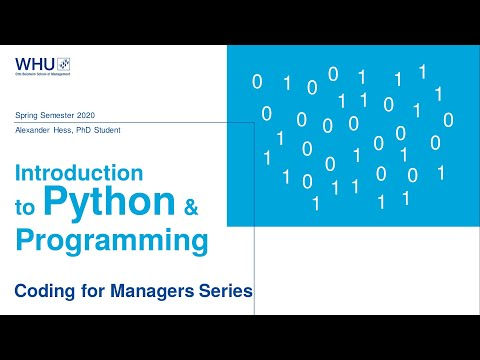

In [166]:
from IPython.display import YouTubeVideo
YouTubeVideo("ePzzq2YBWjY", width="60%")